In [1]:
#importing libraries here: 
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_auc_score
from nltk.stem.snowball import SnowballStemmer
import nltk
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.decomposition import SparsePCA, TruncatedSVD

In [2]:
# Read data
reddit = pd.read_csv("Data/Reddit_Data.csv")
reddit

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [3]:
X = reddit['clean_comment'].fillna(" ")
y = reddit['category']

# Split train_data into testing and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state=3000)

<AxesSubplot:>

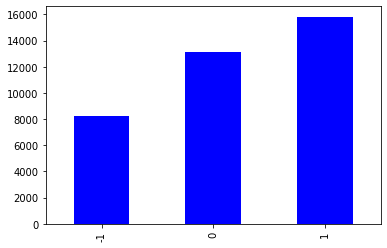

In [7]:
# Data Distribution
reddit.category.value_counts().sort_index().plot(kind='bar',color='blue')

## MultinomialNB

In [22]:
# Range of alpha values from 0-1
alpha = np.arange(0,1.1,0.1)

#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

#Iterate through each alpha value
for a in alpha:
    # Define a MultinomialNB model with current alpha value
    mnb = MultinomialNB(alpha = a).fit(X_train_vectorized, y_train)
    
    # Predict
    train_pred = mnb.predict(X_train_vectorized)
    val_pred = mnb.predict(X_val_vectorized)
    
    # Accuracy scores
    train_error = accuracy_score(y_train, train_pred)
    val_error = accuracy_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred, average='macro')
    
    print(f'alpha: {a}')
    print(f'Training score: {train_error}')
    print(f'Val score: {val_error}')
    print(f'F1 score: {f1}')

/Users/jasmineliu0114/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


alpha: 0.0
Training score: 0.9907379442263163
Val score: 0.568993288590604
F1 score: 0.5111081265635883
alpha: 0.1
Training score: 0.9810396322024229
Val score: 0.5828187919463087
F1 score: 0.5009955478662155
alpha: 0.2
Training score: 0.9596966341152388
Val score: 0.5481879194630872
F1 score: 0.4368847167738066
alpha: 0.30000000000000004
Training score: 0.907849256686466
Val score: 0.5315436241610738
F1 score: 0.40584530087769727
alpha: 0.4
Training score: 0.8442565186751233
Val score: 0.5220134228187919
F1 score: 0.38807475995179547
alpha: 0.5
Training score: 0.7903285345145811
Val score: 0.5159731543624161
F1 score: 0.37694960201116195
alpha: 0.6000000000000001
Training score: 0.7468371421859794
Val score: 0.5096644295302013
F1 score: 0.36492880050952947
alpha: 0.7000000000000001
Training score: 0.710527198899292
Val score: 0.505503355704698
F1 score: 0.3574286850799983
alpha: 0.8
Training score: 0.682774589751334
Val score: 0.5009395973154362
F1 score: 0.34970585216598016
alpha: 0.

## Logistic Regression

### One-vs-Rest

In [25]:
#Logistic regression, One-vs-Rest method 
# Range of min_df values from 0-10
min_df = range(11)

# Iterate through min_df values
for m in min_df:
    #create the vocabulary based on the training data
    vect = TfidfVectorizer(min_df=m, ngram_range=(1,2)).fit(X_train)

    #encode the words in X_train and X_val based on the vocabulary
    X_train_vectorized = vect.transform(X_train)
    X_val_vectorized = vect.transform(X_val)

    # Pass a LogisticRegression model through a OneVsRestClassifier object
    ovr = OneVsRestClassifier(LogisticRegression(n_jobs = -1))
    ovr.fit(X_train_vectorized, y_train)
    
    # Predict
    train_pred = ovr.predict(X_train_vectorized)
    val_pred = ovr.predict(X_val_vectorized)
    
    # Accuracy scores
    train_score = accuracy_score(train_pred, y_train)
    val_score = accuracy_score(val_pred, y_val)
    f1 = f1_score(y_val, val_pred, average='macro')

    print(m)
    print(f"train error: {1-train_score}")
    print(f"test error: {1-val_score}")
    print(f'F1 score: {f1}')

0
train error: 0.09272123225611595
test error: 0.207248322147651
F1 score: 0.7604993785340816
1
train error: 0.09272123225611595
test error: 0.207248322147651
F1 score: 0.7604993785340816
2
train error: 0.09007013658176444
test error: 0.17919463087248322
F1 score: 0.7907751900651016
3
train error: 0.09124467264002145
test error: 0.1719463087248322
F1 score: 0.798881716308432
4
train error: 0.09201651062116178
test error: 0.16697986577181212
F1 score: 0.8045748098109895
5
train error: 0.09312393033323263
test error: 0.16389261744966444
F1 score: 0.8089843591249545
6
train error: 0.0938286519681869
test error: 0.1605369127516778
F1 score: 0.8124134451547979
7
train error: 0.09473472264169935
test error: 0.15892617449664426
F1 score: 0.8155688381392278
8
train error: 0.09621128225779385
test error: 0.1573154362416107
F1 score: 0.8174608004045939
9
train error: 0.09664753850800367
test error: 0.15382550335570466
F1 score: 0.8210873192590604
10
train error: 0.09651330581563144
test error: 0

### One-vs-One

In [24]:
# Range of min_df values from 0-10
min_df = range(11)

# Iterate through min_df values
for m in min_df:
    #create the vocabulary based on the training data
    vect = TfidfVectorizer(min_df=m, ngram_range=(1,2)).fit(X_train)

    #encode the words in X_train and X_val based on the vocabulary
    X_train_vectorized = vect.transform(X_train)
    X_val_vectorized = vect.transform(X_val)

    # Pass a LogisticRegression model through a OneVsOneClassifier object
    ovo = OneVsOneClassifier(LogisticRegression(n_jobs = -1))
    ovo.fit(X_train_vectorized, y_train)
    ovo.fit(X_train_vectorized, y_train)
    
    # Predict
    train_pred = ovo.predict(X_train_vectorized)
    val_pred = ovo.predict(X_val_vectorized)
    
    # Accuracy scores
    train_score = accuracy_score(train_pred, y_train)
    val_score = accuracy_score(val_pred, y_val)
    f1 = f1_score(y_val, val_pred, average='macro')

    print(m)
    print(f"train error: {1-train_score}")
    print(f"test error: {1-val_score}")
    print(f'F1 score: {f1}')

0
train error: 0.11611127890197659
test error: 0.2303355704697987
F1 score: 0.736031470758998
1
train error: 0.11611127890197659
test error: 0.2303355704697987
F1 score: 0.736031470758998
2
train error: 0.10537266351219843
test error: 0.19597315436241614
F1 score: 0.7723623098098177
3
train error: 0.10413101110775524
test error: 0.18644295302013425
F1 score: 0.7836559905854571
4
train error: 0.10392966206919696
test error: 0.18201342281879196
F1 score: 0.7893975932432641
5
train error: 0.10490284908889558
test error: 0.17946308724832216
F1 score: 0.7923192452356268
6
train error: 0.10574180341622197
test error: 0.17624161073825506
F1 score: 0.7959511071068656
7
train error: 0.10530554716601226
test error: 0.17355704697986574
F1 score: 0.7990915910585322
8
train error: 0.10574180341622197
test error: 0.170738255033557
F1 score: 0.8025340856163403
9
train error: 0.10631229235880402
test error: 0.16832214765100673
F1 score: 0.8057203007064307
10
train error: 0.10527198899291923
test error

## KNN

In [5]:
# Range of min_df values from 0-10
min_df = range(11)

# Iterate through min_df values
for m in min_df:
    #create the vocabulary based on the training data
    vect = TfidfVectorizer(min_df=m, ngram_range=(1,2)).fit(X_train)

    #encode the words in X_train and X_val based on the vocabulary
    X_train_vectorized = vect.transform(X_train)
    X_val_vectorized = vect.transform(X_val)

    # Define a KNeighborsClassifier model
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(X_train_vectorized, y_train)
    
    # Predict
    train_pred = knn.predict(X_train_vectorized)
    val_pred = knn.predict(X_val_vectorized)
    
    # Accuracy scores
    train_score = accuracy_score(train_pred, y_train)
    val_score = accuracy_score(val_pred, y_val)
    f1 = f1_score(y_val, val_pred, average='macro')

    print(m)
    print(f"train error: {1-train_score}")
    print(f"test error: {1-val_score}")
    print(f'F1 score: {f1}')

0
train error: 0.6351891003053793
test error: 0.6316778523489932
F1 score: 0.19826696745751912
1
train error: 0.6351891003053793
test error: 0.6316778523489932
F1 score: 0.19826696745751912


KeyboardInterrupt: 

## Decision Tree

In [ ]:
# Without pruning conditions
#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

# Define DecisionTreeClassifier model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_vectorized, y_train)

# Predict
train_pred = dtc.predict(X_train_vectorized)
val_pred = dtc.predict(X_val_vectorized)
    
# Accuracy scores
train_score = accuracy_score(train_pred, y_train)
val_score = accuracy_score(val_pred, y_val)
f1 = f1_score(y_val, val_pred, average='macro')

print(f"train error: {1-train_score}")
print(f"test error: {1-val_score}")
print(f'F1 score: {f1}')

In [ ]:
# Hyperparameters
max_depth = [x for x in range(1, 11)]
min_samples_split = [x for x in range(2, 11)]
min_samples_leaf = [x for x in range(1, 11)]
param_grid = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 
              'min_samples_leaf': min_samples_leaf}

#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

# Define a DecisionTreeRegressor model
dtc = DecisionTreeClassifier(random_state=0)

# Perform random search cv on the decision tree model to determine the best
# max_depth, min_samples_split , and min_samples leaf values
dtc_cv = RandomizedSearchCV(dtc, param_grid, cv=10, n_jobs=-1, random_state=123)
dtc_cv.fit(X_train_vectorized, y_train)

# The best parameters
best_md = dtc_cv.best_params_['max_depth']
best_mss = dtc_cv.best_params_['min_samples_split']
best_msl = dtc_cv.best_params_['min_samples_leaf']
print('Best max depth: ' + str(best_md))
print('Best min samples split: ' + str(best_mss))
print('Best min samples leaf: ' + str(best_msl))

# Predict
train_pred = dtc_cv.predict(X_train_vectorized)
val_pred = dtc_cv.predict(X_val_vectorized)
   
# Accuracy scores
train_score = accuracy_score(train_pred, y_train)
val_score = accuracy_score(val_pred, y_val)
f1 = f1_score(y_val, val_pred, average='macro')

print(f"train error: {1-train_score}")
print(f"test error: {1-val_score}")
print(f'F1 score: {f1}')

## RandomForest

In [ ]:
# Without pruning conditions
#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

# Define a RandomForestClassifier model
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_vectorized, y_train)

# Predict
train_pred = rfc.predict(X_train_vectorized)
val_pred = rfc.predict(X_val_vectorized)
 
# Accuracy scores
train_score = accuracy_score(train_pred, y_train)
val_score = accuracy_score(val_pred, y_val)
f1 = f1_score(y_val, val_pred, average='macro')

print(f"train error: {1-train_score}")
print(f"test error: {1-val_score}")
print(f'F1 score: {f1}')

In [ ]:
# Hyperparameters
max_depth = [x for x in range(1, 11)]
num_trees = [1, 50, 100, 150, 200, 300, 400]
param_grid = {'max_depth': max_depth, 'n_estimators': num_trees}

#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

# Define a RandomForestClassifier model
rfc = RandomForestClassifier(random_state=0)

# Perform random search cv on the random forest model to determine the best
# n_estimators and max_depth values
rfc_cv = RandomizedSearchCV(rfc, param_grid, cv=10, n_jobs=-1, random_state=123)
rfc_cv.fit(X_train_vectorized, y_train)

# The best parameters
best_md = rfc_cv.best_params_['max_depth']
best_ne = rfc_cv.best_params_['n_estimators']
print('Best max depth: ' + str(best_md))
print('Best number of trees: ' + str(best_ne))

# Predict
train_pred = rfc_cv.predict(X_train_vectorized)
val_pred = rfc_cv.predict(X_val_vectorized)

# Accuracy scores
train_score = accuracy_score(train_pred, y_train)
val_score = accuracy_score(val_pred, y_val)
f1 = f1_score(y_val, val_pred, average='macro')

print(f"train error: {1-train_score}")
print(f"test error: {1-val_score}")
print(f'F1 score: {f1}')